In [25]:
import os, time

import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

import pcms.tree
import pcms.haar

In [2]:
DATA = os.environ['DATA']
GN_DATA = os.path.join(DATA, 'guerrero_negro')
GG_DATA = os.path.join(DATA, 'greengenes/gg_13_8_otus')
GG_TREES = os.path.join(GG_DATA, 'trees')
GG_OTU_MAPS = os.path.join(GG_DATA, 'otus')

In [3]:
tree = pcms.tree.cbst(50, planted=True)
lam = 1.0
for i in range(tree.n_nodes):
    tree.set_edge_length(i, np.random.exponential(lam))

In [4]:
n = tree.find_n_leaves()
epl = tree.find_epl()
frac = 2 * (epl + 1) / (n * n) - 3 / n
nnz_max = int(np.ceil(frac * n * (n - 1)))
print(epl, n, frac, nnz_max, n**2, nnz_max / n**2)

488 50 0.3312 812 2500 0.3248


In [5]:
start = time.time()
Q, S = pcms.haar.sparsify(tree)
print("Elapsed time: ", time.time() - start)

Elapsed time:  0.0011382102966308594


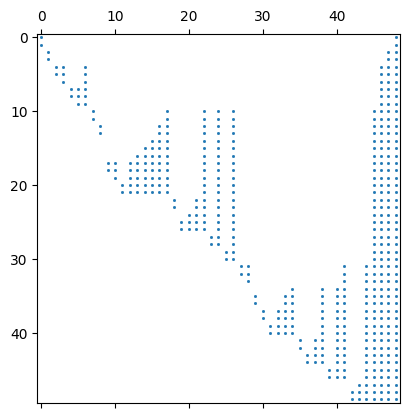

In [7]:
plt.spy(Q, markersize=1)
plt.show()

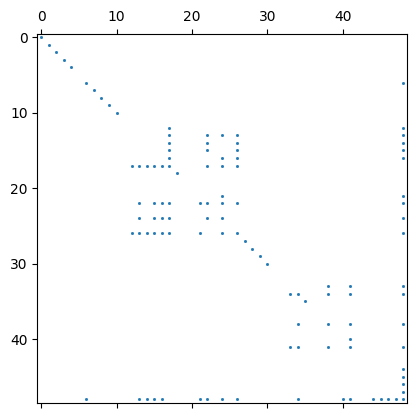

In [8]:
plt.spy(S, markersize=1)
plt.show()

In [9]:
tree = pcms.tree.nwk2tree(os.path.join(GG_TREES, '97_otus.nwk'))

In [10]:
tree.n_nodes

198644

In [11]:
start = time.time()
Q, S = pcms.haar.sparsify(tree)
print("Elapsed time: ", time.time() - start)

Elapsed time:  535.0197951793671


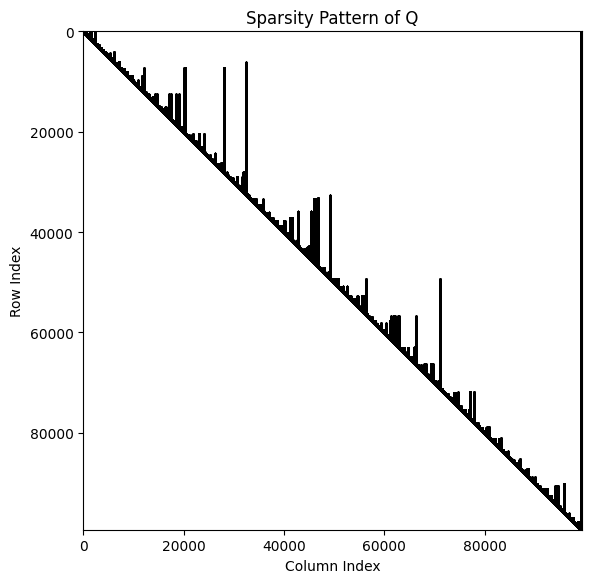

In [39]:
Q_coo = Q.tocoo()

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(Q_coo.col, Q_coo.row, s=0.05, color="black", marker='.', alpha=0.8)

ax.set_aspect('equal', 'box')
ax.invert_yaxis()
ax.set_xlabel("Column Index")
ax.set_ylabel("Row Index")
ax.set_title("Sparsity Pattern of Q")
ax.set_xlim(0, Q.shape[1])
ax.set_ylim(Q.shape[0], 0)

plt.tight_layout()
plt.show()

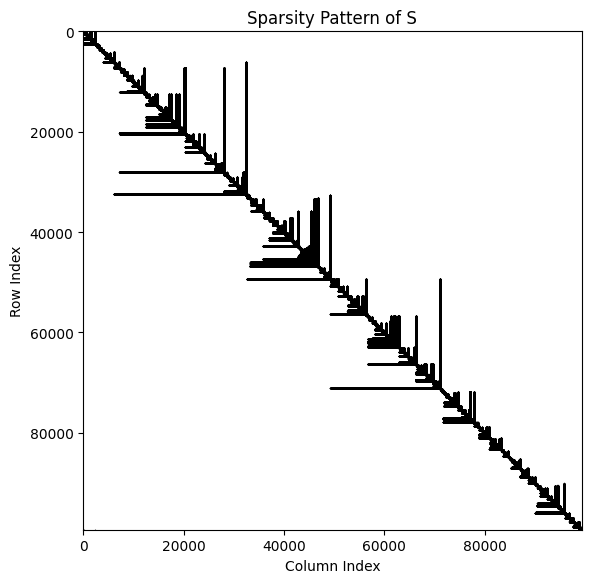

In [38]:
S_coo = S.tocoo()

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(S_coo.col, S_coo.row, s=0.05, color="black", marker='.', alpha=0.8)

ax.set_aspect('equal', 'box')
ax.invert_yaxis()
ax.set_xlabel("Column Index")
ax.set_ylabel("Row Index")
ax.set_title("Sparsity Pattern of S")
ax.set_xlim(0, S.shape[1])
ax.set_ylim(S.shape[0], 0)

plt.tight_layout()
plt.show()